# Keras for Simple Classification

Necessary Imports 

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [38]:
import pandas as pd
import tensorflow as tf
import numpy as np

In [3]:
print(tf.__version__)

2.10.0


Importing the file into **pandas** dataframe

In [37]:
Bankruptcy = pd.read_csv(r"G:\Ddrive\PG DBDA\12 Practical Machine Learning_\Cases\Bankruptcy\Bankruptcy.csv")
Bankruptcy.head()

,NO,D,YR,R1,R2,R3,R4,R5,R6,R7,...,R15,R16,R17,R18,R19,R20,R21,R22,R23,R24
0,1,0,78,0.23,0.08,0.02,0.03,0.46,0.12,0.19,...,0.05,0.57,0.15,0.23,3.56,0.26,1.55,0.43,0.11,0.17
1,2,0,77,0.19,0.07,0.09,0.12,0.02,0.02,0.03,...,0.09,0.12,0.16,0.22,3.78,1.29,1.40,0.06,0.07,0.10
2,3,0,72,0.07,0.02,0.03,0.05,0.06,0.10,0.14,...,-0.03,0.02,0.02,0.04,13.29,1.61,1.43,0.03,0.05,0.07
3,4,0,80,0.07,0.03,0.04,0.04,0.04,0.06,0.06,...,-0.02,0.01,0.02,0.02,5.36,1.30,1.12,-0.06,-0.08,-0.09
4,5,0,81,0.09,0.02,0.03,0.04,0.06,0.08,0.11,...,0.02,0.07,0.10,0.14,7.74,1.48,1.41,0.03,0.04,0.06


For the column **Class** which is a response variable, the hot encoding / dummying needs to be done.

In [5]:
dum_df = pd.get_dummies(df)
dum_df.drop(['Class_Benign'],axis="columns",inplace = True)
dum_df.head()

,Code,Clump,UniCell_Size,Uni_CellShape,MargAdh,SEpith,BareN,BChromatin,NoemN,Mitoses,Class_Malignant
0,61634,5,4,3,1,2,2,2,3,1,False
1,63375,9,1,2,6,4,10,7,7,2,True
2,76389,10,4,7,2,2,8,6,1,1,True
3,95719,6,10,10,10,8,10,7,10,7,True
4,128059,1,1,1,1,2,5,5,1,1,False


In [6]:
dum_df.shape

(699, 11)

We now create two separate objects for feature variables **X** and output variable **y**

In [39]:
X = Bankruptcy.iloc[:,2:]
y = Bankruptcy.iloc[:,1]

In [40]:
X.head()

,YR,R1,R2,R3,R4,R5,R6,R7,R8,R9,...,R15,R16,R17,R18,R19,R20,R21,R22,R23,R24
0,78,0.23,0.08,0.02,0.03,0.46,0.12,0.19,10.36,1.17,...,0.05,0.57,0.15,0.23,3.56,0.26,1.55,0.43,0.11,0.17
1,77,0.19,0.07,0.09,0.12,0.02,0.02,0.03,3.13,1.73,...,0.09,0.12,0.16,0.22,3.78,1.29,1.40,0.06,0.07,0.10
2,72,0.07,0.02,0.03,0.05,0.06,0.10,0.14,2.41,1.36,...,-0.03,0.02,0.02,0.04,13.29,1.61,1.43,0.03,0.05,0.07
3,80,0.07,0.03,0.04,0.04,0.04,0.06,0.06,5.55,1.13,...,-0.02,0.01,0.02,0.02,5.36,1.30,1.12,-0.06,-0.08,-0.09
4,81,0.09,0.02,0.03,0.04,0.06,0.08,0.11,2.85,1.88,...,0.02,0.07,0.10,0.14,7.74,1.48,1.41,0.03,0.04,0.06


In [41]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: D, dtype: int64

We now, split the data into train and test

In [42]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, 
                                                    random_state=2024,stratify=y)

Scaling the data

In [43]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)    
X_test = scaler.transform(X_test)

In [44]:
(X_train.shape, y_train.shape)

((92, 25), (92,))

Conversion of objects **y_train** and **y_test** into numpy array

In [45]:
y_train = y_train.values
y_test = y_test.values

Let us now define the neural network through which we plan to build the MLP model

For getting reproducible results, we set random number seed and do necessary imports

**Model Definition:**

In [46]:
tf.random.set_seed(2024)
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(4, activation='relu',input_shape=(X_train.shape[1],)), 
    tf.keras.layers.Dense(1, activation='sigmoid')  
])

**Initialized Variable Values:**

In [47]:
model.variables

[<tf.Variable 'dense_4/kernel:0' shape=(25, 4) dtype=float32, numpy=
 array([[-0.18431726, -0.23306334,  0.18162084,  0.28962344],
        [-0.37744486,  0.01261452, -0.06068325, -0.34079406],
        [-0.15338182, -0.21969098, -0.05609021,  0.29100376],
        [-0.1072309 , -0.1244978 ,  0.16545999, -0.08604354],
        [-0.35901195,  0.45360833, -0.27764833, -0.07938695],
        [-0.2144118 ,  0.20609772, -0.22396314, -0.02322084],
        [ 0.2966199 , -0.30857062, -0.3920433 ,  0.35619807],
        [-0.07826573,  0.27416533, -0.21502246, -0.45127338],
        [-0.06433952, -0.41169366,  0.14250928, -0.22922617],
        [-0.12597364, -0.38136443,  0.34340733,  0.09086043],
        [-0.39948156,  0.07744348, -0.18848705,  0.37047672],
        [ 0.08546597,  0.3232479 , -0.35962182,  0.3428731 ],
        [ 0.07272679,  0.31208593,  0.20921338, -0.2116851 ],
        [ 0.29697853,  0.33884883,  0.16300929, -0.03515434],
        [-0.39861867,  0.06305432, -0.40511906, -0.17535079],
 

In [48]:
model.compile(optimizer='sgd', loss='binary_crossentropy',metrics=['accuracy'])

In [49]:
model.metrics_names

[]

In [50]:
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 4)                 104       
                                                                 
 dense_5 (Dense)             (None, 1)                 5         
                                                                 
Total params: 109
Trainable params: 109
Non-trainable params: 0
_________________________________________________________________
None


**Model Fitting:**

In [51]:
history = model.fit( X_train,y_train,validation_data=(X_test,y_test),verbose=2,epochs=500)

Epoch 1/500
3/3 - 4s - loss: 0.7207 - accuracy: 0.5000 - val_loss: 0.7198 - val_accuracy: 0.5000 - 4s/epoch - 1s/step
Epoch 2/500
3/3 - 0s - loss: 0.7186 - accuracy: 0.5000 - val_loss: 0.7176 - val_accuracy: 0.5000 - 118ms/epoch - 39ms/step
Epoch 3/500
3/3 - 0s - loss: 0.7168 - accuracy: 0.5000 - val_loss: 0.7155 - val_accuracy: 0.5000 - 120ms/epoch - 40ms/step
Epoch 4/500
3/3 - 0s - loss: 0.7151 - accuracy: 0.5000 - val_loss: 0.7137 - val_accuracy: 0.5000 - 121ms/epoch - 40ms/step
Epoch 5/500
3/3 - 0s - loss: 0.7136 - accuracy: 0.5109 - val_loss: 0.7120 - val_accuracy: 0.5000 - 108ms/epoch - 36ms/step
Epoch 6/500
3/3 - 0s - loss: 0.7122 - accuracy: 0.5109 - val_loss: 0.7104 - val_accuracy: 0.5000 - 107ms/epoch - 36ms/step
Epoch 7/500
3/3 - 0s - loss: 0.7113 - accuracy: 0.5217 - val_loss: 0.7090 - val_accuracy: 0.5000 - 108ms/epoch - 36ms/step
Epoch 8/500
3/3 - 0s - loss: 0.7101 - accuracy: 0.5217 - val_loss: 0.7075 - val_accuracy: 0.5000 - 107ms/epoch - 36ms/step
Epoch 9/500
3/3 - 0s 

**Optimized Variable Values:**

In [52]:
model.get_weights()

[array([[-0.18431726, -0.41572788,  0.17625953,  0.28962344],
        [-0.37744486,  0.2711586 , -0.0622665 , -0.34079406],
        [-0.15338182, -0.2761172 , -0.0565956 ,  0.29100376],
        [-0.1072309 , -0.0445919 ,  0.16398993, -0.08604354],
        [-0.35901195,  0.6219468 , -0.2783299 , -0.07938695],
        [-0.2144118 ,  0.03325609, -0.23037122, -0.02322084],
        [ 0.2966199 , -0.3558636 , -0.39008394,  0.35619807],
        [-0.07826573,  0.3912516 , -0.21321726, -0.45127338],
        [-0.06433952, -0.40116733,  0.14212944, -0.22922617],
        [-0.12597364,  0.08414114,  0.3375056 ,  0.09086043],
        [-0.39948156, -0.02334689, -0.18895186,  0.37047672],
        [ 0.08546597,  0.03317712, -0.36972114,  0.3428731 ],
        [ 0.07272679, -0.13323732,  0.20707938, -0.2116851 ],
        [ 0.29697853,  0.16881527,  0.15308882, -0.03515434],
        [-0.39861867,  0.17919485, -0.4099768 , -0.17535079],
        [ 0.2346304 ,  0.3015241 , -0.04316742, -0.2876842 ],
        

In [53]:
%matplotlib inline

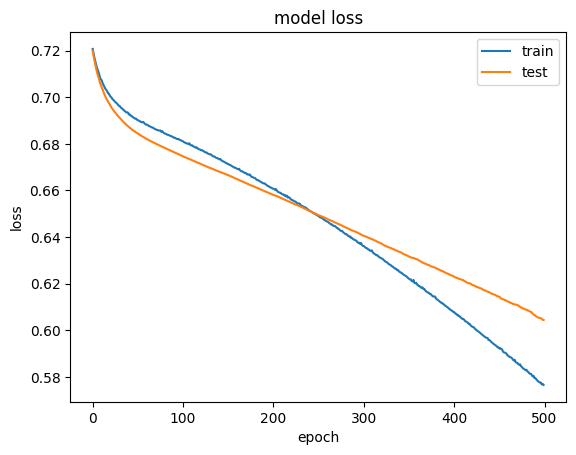

In [54]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [55]:
from sklearn.metrics import log_loss
y_pred_prob = model.predict(X_test)
log_loss(y_true=y_test,y_pred=y_pred_prob)

2/2 [==============================] - 0s 7ms/step


0.6044107234637632

In [24]:
y_pred_prob

array([[0.99590945],
       [0.00356955],
       [0.8117903 ],
       [0.00981548],
       [0.00382599],
       [0.9802919 ],
       [0.00333023],
       [0.9926599 ],
       [0.0062531 ],
       [0.98973083],
       [0.00498147],
       [0.00523598],
       [0.47786817],
       [0.99563295],
       [0.03981706],
       [0.00357197],
       [0.06418961],
       [0.01123399],
       [0.00333023],
       [0.00789416],
       [0.01871861],
       [0.01999685],
       [0.963215  ],
       [0.04102002],
       [0.01356677],
       [0.6785496 ],
       [0.98596966],
       [0.01732611],
       [0.00851739],
       [0.9745449 ],
       [0.986985  ],
       [0.01113348],
       [0.00969698],
       [0.9939486 ],
       [0.9945098 ],
       [0.9762175 ],
       [0.00310481],
       [0.99357986],
       [0.9893035 ],
       [0.00583881],
       [0.00431359],
       [0.00662752],
       [0.00642101],
       [0.04391455],
       [0.00382599],
       [0.07369736],
       [0.01271424],
       [0.011

In [56]:
from sklearn.metrics import accuracy_score
predict_probs= model.predict(X_test)
predict_probs[:5]

2/2 [==============================] - 0s 9ms/step


array([[0.63700294],
       [0.5412294 ],
       [0.40487373],
       [0.5132159 ],
       [0.4946392 ]], dtype=float32)

In [26]:
predict_probs

array([[0.99590945],
       [0.00356955],
       [0.8117903 ],
       [0.00981548],
       [0.00382599],
       [0.9802919 ],
       [0.00333023],
       [0.9926599 ],
       [0.0062531 ],
       [0.98973083],
       [0.00498147],
       [0.00523598],
       [0.47786817],
       [0.99563295],
       [0.03981706],
       [0.00357197],
       [0.06418961],
       [0.01123399],
       [0.00333023],
       [0.00789416],
       [0.01871861],
       [0.01999685],
       [0.963215  ],
       [0.04102002],
       [0.01356677],
       [0.6785496 ],
       [0.98596966],
       [0.01732611],
       [0.00851739],
       [0.9745449 ],
       [0.986985  ],
       [0.01113348],
       [0.00969698],
       [0.9939486 ],
       [0.9945098 ],
       [0.9762175 ],
       [0.00310481],
       [0.99357986],
       [0.9893035 ],
       [0.00583881],
       [0.00431359],
       [0.00662752],
       [0.00642101],
       [0.04391455],
       [0.00382599],
       [0.07369736],
       [0.01271424],
       [0.011

In [57]:
predict_classes = np.where(predict_probs>=0.5,1,0)
predict_classes[:5]

array([[1],
       [1],
       [0],
       [1],
       [0]])

In [58]:
acc = accuracy_score(y_test,predict_classes)
print(f"Accuracy: {acc}")

Accuracy: 0.6


# Early Stopping

If we continue to train the network, it may overfit. We can have a stop point where the accuracy may start falling.

For getting reproducible results, we set random number seed and do necessary imports

In [61]:
tf.random.set_seed(2022)
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(4, activation='relu',input_shape=(X_train.shape[1], )), 
    tf.keras.layers.Dense(1, activation='sigmoid')  
])

In [62]:
model.compile(optimizer='sgd', loss='binary_crossentropy',metrics=['accuracy'])

In [63]:
from tensorflow.keras.callbacks import EarlyStopping
monitor = EarlyStopping(monitor='val_loss', min_delta=0.001, patience=5, verbose=2, mode='auto',restore_best_weights=True)

history2 = model.fit(X_train,y_train,validation_data=(X_test,y_test),callbacks=[monitor],verbose=2,epochs=500)

Epoch 1/500
3/3 - 4s - loss: 0.6821 - accuracy: 0.5109 - val_loss: 0.6903 - val_accuracy: 0.5000 - 4s/epoch - 1s/step
Epoch 2/500
3/3 - 0s - loss: 0.6821 - accuracy: 0.5109 - val_loss: 0.6900 - val_accuracy: 0.5000 - 109ms/epoch - 36ms/step
Epoch 3/500
3/3 - 0s - loss: 0.6816 - accuracy: 0.5109 - val_loss: 0.6897 - val_accuracy: 0.5000 - 104ms/epoch - 35ms/step
Epoch 4/500
3/3 - 0s - loss: 0.6814 - accuracy: 0.5109 - val_loss: 0.6894 - val_accuracy: 0.5000 - 104ms/epoch - 35ms/step
Epoch 5/500
3/3 - 0s - loss: 0.6810 - accuracy: 0.5109 - val_loss: 0.6891 - val_accuracy: 0.5000 - 107ms/epoch - 36ms/step
Epoch 6/500
3/3 - 0s - loss: 0.6808 - accuracy: 0.5109 - val_loss: 0.6888 - val_accuracy: 0.5000 - 104ms/epoch - 35ms/step
Epoch 7/500
3/3 - 0s - loss: 0.6807 - accuracy: 0.5109 - val_loss: 0.6885 - val_accuracy: 0.5000 - 103ms/epoch - 34ms/step
Epoch 8/500
3/3 - 0s - loss: 0.6803 - accuracy: 0.5109 - val_loss: 0.6883 - val_accuracy: 0.5000 - 106ms/epoch - 35ms/step
Epoch 9/500
3/3 - 0s 

Let us see the parameters in the early stopping involved:
- **monitor**: quantity to be monitored.<br>
- **min_delta**: minimum change in the monitored quantity to qualify as an improvement, i.e. an absolute change of less than min_delta, will count as no improvement.<br>
- **patience**: number of epochs with no improvement after which training will be stopped.<br>
- **mode**: one of {auto, min, max}. In min mode, training will stop when the quantity monitored has stopped decreasing; in max mode it will stop when the quantity monitored has stopped increasing; in auto mode, the direction is automatically inferred from the name of the monitored quantity.
- **baseline**: Baseline value for the monitored quantity to reach. Training will stop if the model doesn't show improvement over the baseline.<br>
- **restore_best_weights**: whether to restore model weights from the epoch with the best value of the monitored quantity. If False, the model weights obtained at the last step of training are used.

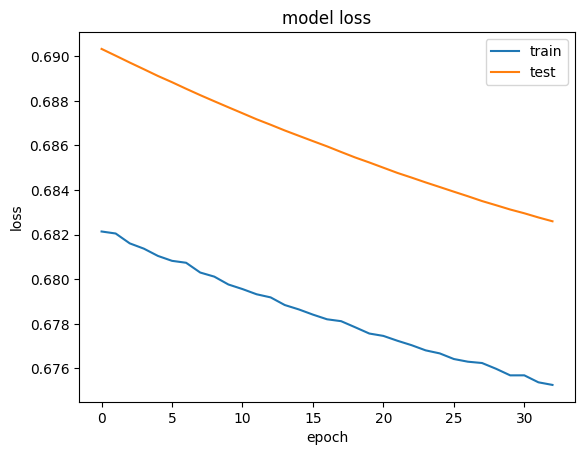

In [64]:
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [65]:
from sklearn.metrics import log_loss
y_pred_prob = model.predict(X_test)
log_loss(y_true=y_test,y_pred=y_pred_prob)

2/2 [==============================] - 0s 8ms/step


0.6835069618562782

In [66]:
predict_probs= model.predict(X_test)
predict_probs[:5]

2/2 [==============================] - 0s 7ms/step


array([[0.5911796 ],
       [0.5282793 ],
       [0.5432758 ],
       [0.544815  ],
       [0.55176085]], dtype=float32)

In [67]:
predict_classes = np.where(predict_probs>=0.5,1,0)
predict_classes[:5]

array([[1],
       [1],
       [1],
       [1],
       [1]])

In [68]:
acc = accuracy_score(y_test,predict_classes)
print(f"Accuracy: {acc}")

Accuracy: 0.525
